# A Brief Analysis of Philosophy quotes

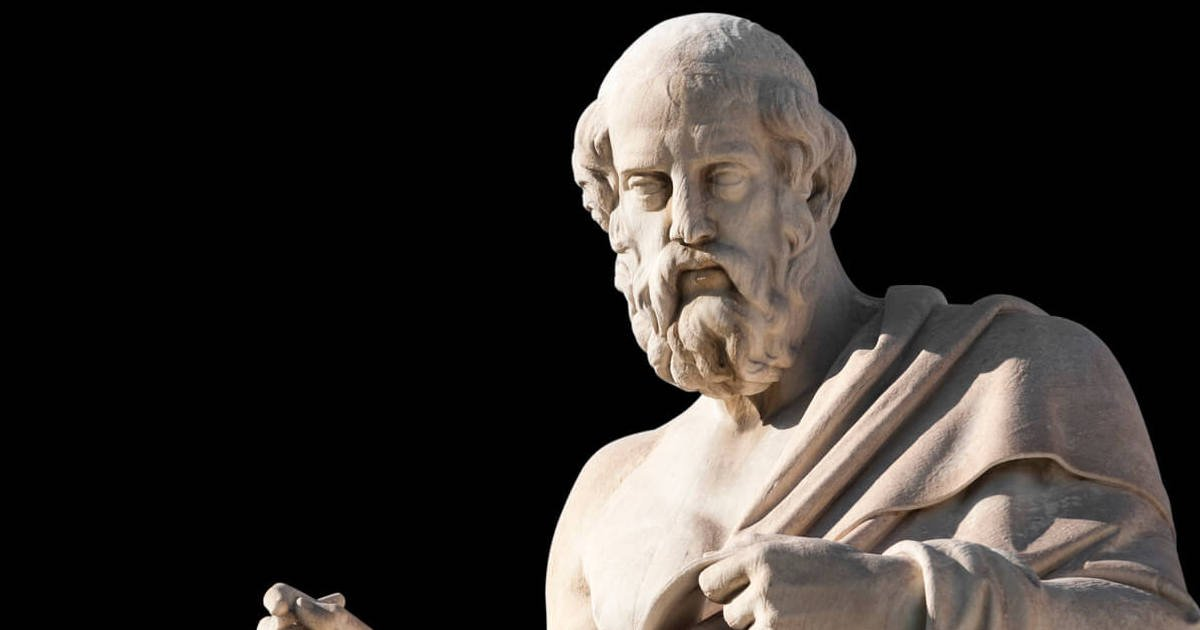

# Table of content

### 1. Introduction
### 2. Data Overview
    Part1: Date
    Part2: Authors, Title, School
    Part3: Sentences length
### 3. Data Analysis
### 4. Conclusion

# Introduction

In this data story, we used the dataset which was complied for the Philosophy Data Project to develop potential features. The data intend to capture huge amount of famous quotes wrote by differnt authors, collected by different titles, and originated from different schools. Generally, this kind of analysis will focus on the text, however, there still can have some numeric features. We are going to not only focusing on the texts, but also the groups who wrote the quotes. More specifically, I would like to find out how the philosopers are different from each other and also the quotes they wrote.

# Data Overview 

This is how the data is strucuted:

In [2]:
#packages

#normal
import numpy as np
import pandas as pd

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
#data
df = pd.read_csv('philosophy_data.csv')
df.info()
print(df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB
0


Some headlines of data:

In [4]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


There are overall 11 columns features of this data, each row represent a unique philosophy sentence sum up to 360807 sentences totally. Good news are we do not have any missing values, but it still possible that we need to do data cleaning for other issues. Generally people will be interested in something like who are the greatest philosophers, who said more famous quotes etc.. It's hard to define who are the greatest, but based on this dataset, we definitely can do some reseach on other quantitative aspects. For further using, I would like to derive the column "tokenized_txt" to a numeric column called word_count which represent how manys words used in a quotes. 

In [5]:
df['word_count'] = list(map(len,map(eval,df['tokenized_txt'])))

Some updated headlines of data:

In [6]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,word_count
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...",23
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...,12
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...,11
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?,5
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ...",19


Let's firstly find some general features of the columns, and those results also can answer the basic questions people interested. 

## Part1: Date

####  Which time period appeared most quotes and edited quotes? 

Let's observe the original publication date and corpus edition date we have here.

Text(0.5, 1.0, 'original_publication_date')

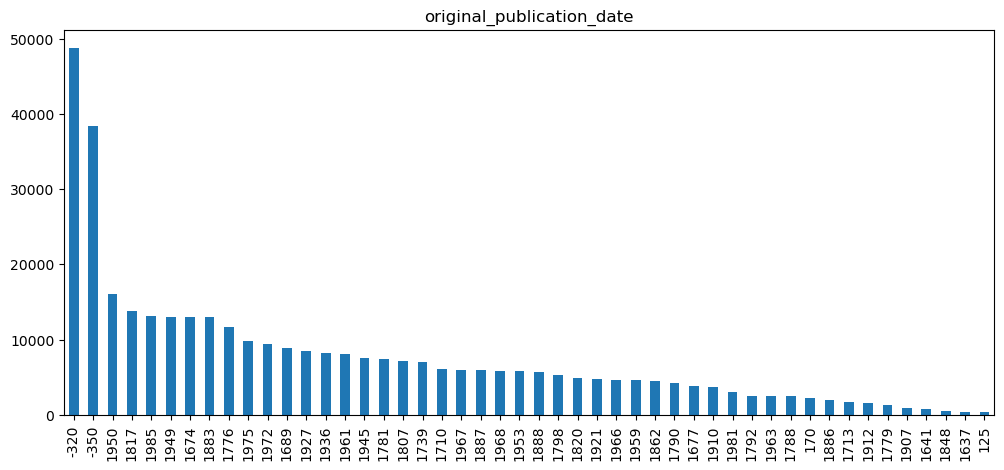

In [7]:
plt.figure(figsize=(12,5))
df['original_publication_date'].value_counts().plot(kind = 'bar')
plt.title('original_publication_date')

Obviously, -320 and -350 are two periods that provided most of the quotes. The strange thing is this dataset doest not contain any quotes between the period of 170 and 1600+, but it is hard to explore only based on the data. And the plot here is automaticly sorted by the number of quotes which is not perfect to find the features through time. Thus, let do some adjustments.

Text(0.5, 1.0, 'original_publication_date')

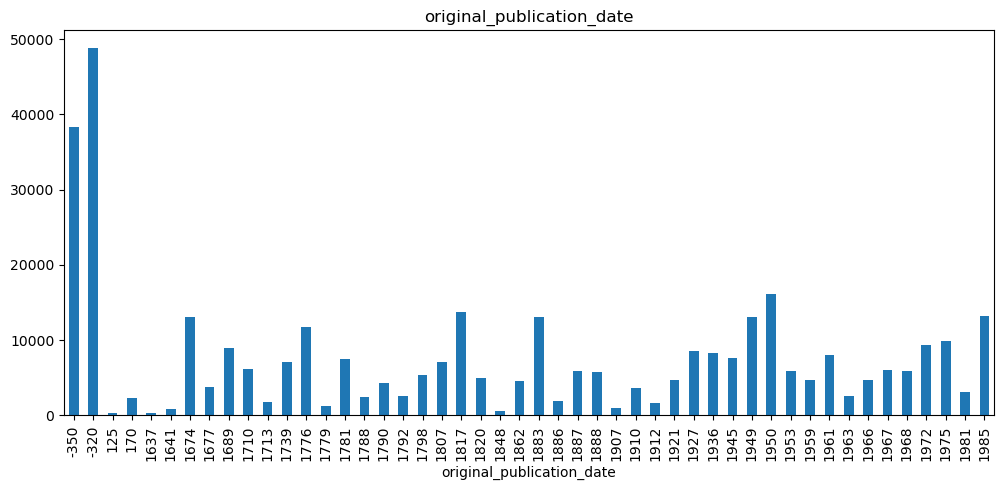

In [8]:
df_date = df.sort_values(by=['original_publication_date'])
df_date['count'] = 1
plt.figure(figsize=(12,5))
df_date.groupby(by = ['original_publication_date']).sum()['count'].plot(kind = 'bar')
plt.title('original_publication_date')

By this chart, we can see the volume of quotes well up from -350 and topped at -320. After that is a sharply dumping and have some siginificant rebounce in some years but still have large gap compare to -350 and -320. This feature does make sense. The beginning of a subject usually from the fisrt major discoveries. Then, many new and relevant discoveries emerge, yet after a period of development they inevitably hit a bottleneck, making it difficult to continue to generate new ideas that are completely different from those of their predecessors. This is also the reason why we see dump.Whenever a bottleneck is broken because of social development, another wave of telltale development is ushered in, which is why there is a bounce from time to time. Let's continue to focus on the edition date.

Text(0.5, 1.0, 'corpus_edition_date')

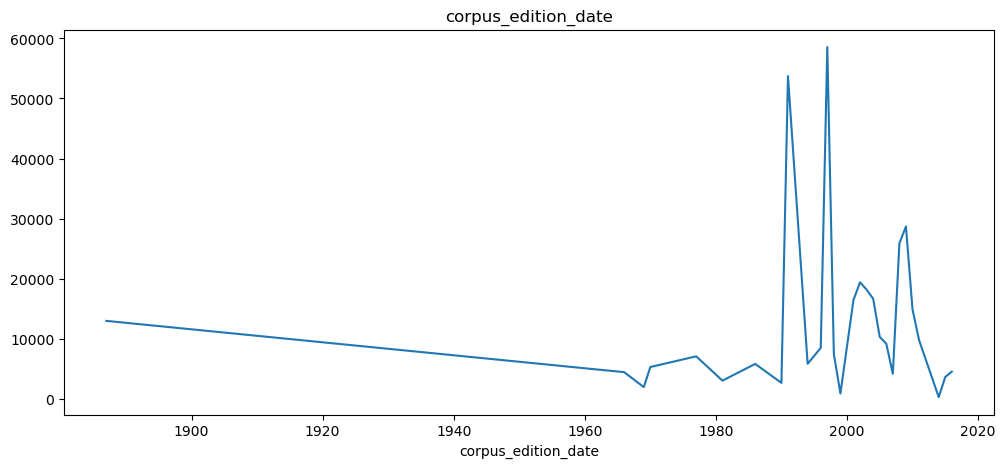

In [9]:
plt.figure(figsize=(12,5))
df_date2 = df.sort_values(by=['corpus_edition_date'])
df_date2['count'] = 1
df_date2.groupby(by = ['corpus_edition_date']).sum()['count'].plot(kind = 'line')
plt.title('corpus_edition_date')

It looks like the edition of predecessors' quotes appear in some specific years. However, it is hard to think about the reason based on this data.

## Part2: Author, Title, School

#### Which philosophier or philosophiers do the most works(wrote most quotes)? 

In [10]:
# 5 authors who have most quotes
print(len(df['author'].value_counts()))
df['author'].value_counts().head(3)

36


Aristotle    48779
Plato        38366
Hegel        22700
Name: author, dtype: int64

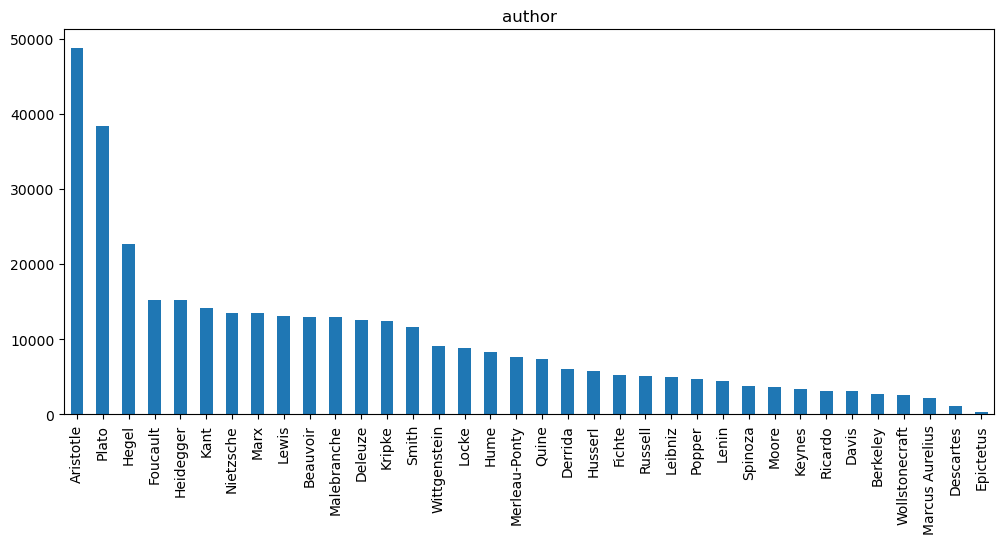

In [40]:
# visualization
plt.figure(figsize=(12,5))
df['author'].value_counts().plot(kind = 'bar')
plt.title('author')
plt.show()

We can see that Aristotle and Plato wrote siginificantly more quotes than other, Hegel also wrote more than most of philosopiers but not that much. Let's explore this also in "title" and "school".

In [11]:
print(len(df['school'].value_counts()))
df['school'].value_counts().head(3)

13


analytic           55425
aristotle          48779
german_idealism    42136
Name: school, dtype: int64

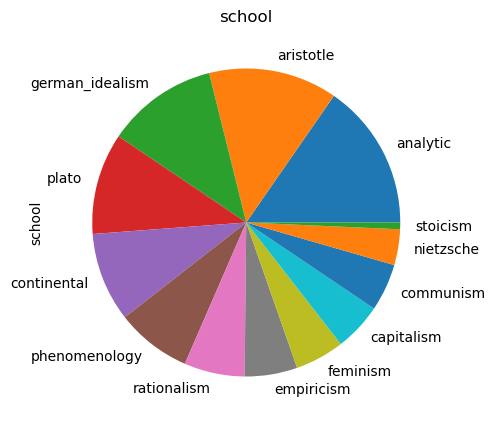

In [12]:
# visualization
plt.figure(figsize=(12,5))
df['school'].value_counts().plot(kind = 'pie')
plt.title('school')
plt.show()

We can see that artistotle and plato respectively represent a whole school. But how special they are compare to other school which able to let them be independently from others? We will explore this question in the following **Data Analysis** part.

In [13]:
print(len(df['title'].value_counts()))
df['title'].value_counts().head(3)

59


Aristotle - Complete Works    48779
Plato - Complete Works        38366
Lewis - Papers                13120
Name: title, dtype: int64

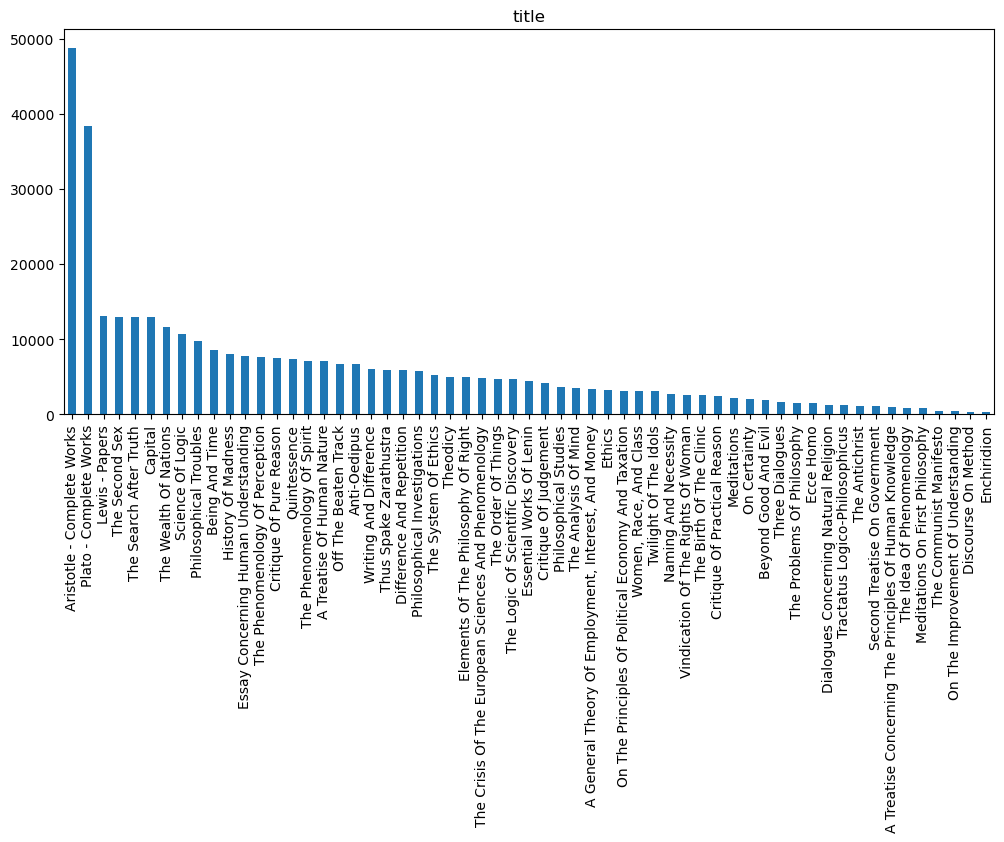

In [14]:
# visualization
plt.figure(figsize=(12,5))
df['title'].value_counts().plot(kind = 'bar')
plt.title('title')
plt.show()

In [80]:
df[df.author=='Hegel'].title.value_counts()

Science Of Logic                       10678
The Phenomenology Of Spirit             7099
Elements Of The Philosophy Of Right     4923
Name: title, dtype: int64

We also find the complete works of Aristotle and Plato still have the most quotes. But we suprisely realize Lewis - Papers is at the third place. So, where Hegel goes? My intuitive guess is Hegel's quotes are distributed in different piece of works, or even not be collected. We can easily verify using our existing data, and the quotes do distributed in three collections.

## Part3: Sentences Length

#### Are there any mysteries of the length of the sentences? How it distributed? (word counts also)

count    360808.000000
mean        150.790964
std         104.822072
min          20.000000
25%          75.000000
50%         127.000000
75%         199.000000
max        2649.000000
Name: sentence_length, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1fb820fc400>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb820fc9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb820fc130>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb820fcf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb82106250>],
 'means': []}

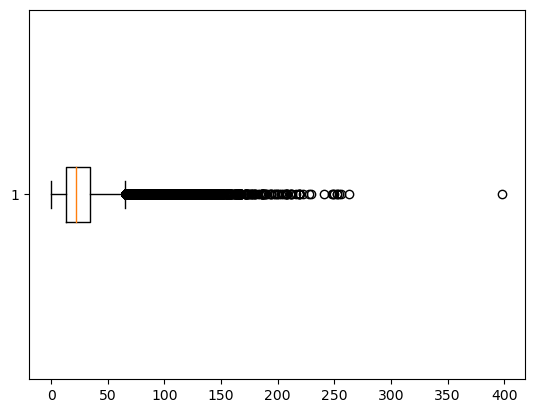

In [15]:
print(df.sentence_length.describe())
plt.boxplot(df.word_count, vert = 0)

count    360808.000000
mean         25.693216
std          17.766261
min           0.000000
25%          13.000000
50%          22.000000
75%          34.000000
max         398.000000
Name: word_count, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1fb821605e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb82160b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb82160310>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb8216e160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb8216e430>],
 'means': []}

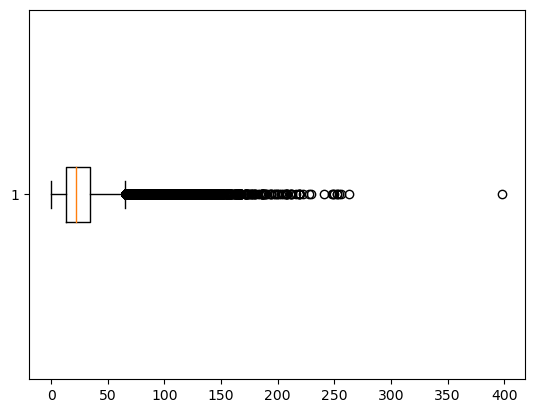

In [16]:
print(df.word_count.describe())
plt.boxplot(df.word_count, vert = 0)

It seems most of quotes have 75-199 letters and 13-34 words. Due to large data size, we also can see there are a lot of outliers which influence the distribution. Quotes from different school and authors may also influence the sentence length. Let us explore the data again by school and author seperately.

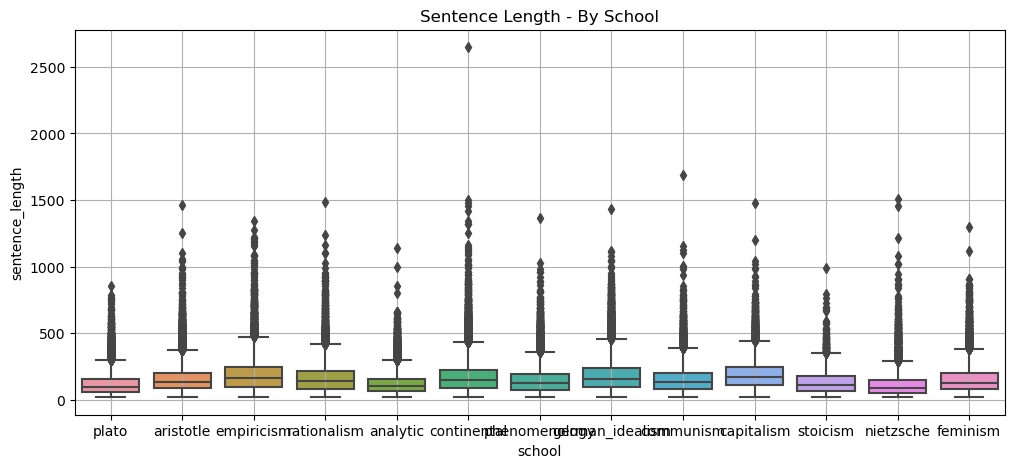

In [17]:
# by schoool
plt.figure(figsize=(12,5))
sns.boxplot(x='school', y='sentence_length', data=df)
plt.title('Sentence Length - By School')
plt.grid()

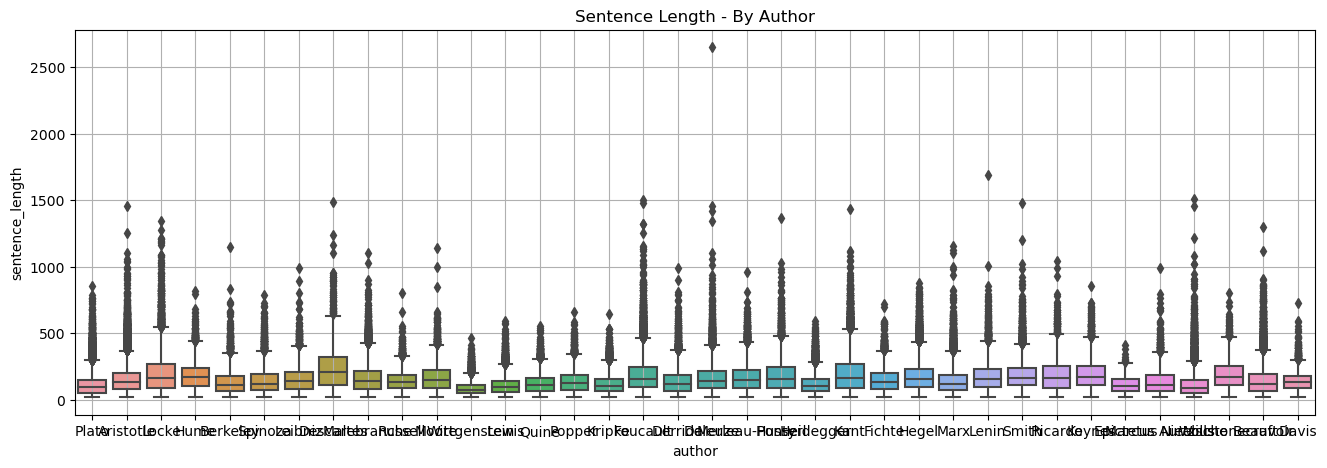

In [18]:
#by author
plt.figure(figsize=(16,5))
sns.boxplot(x='author', y='sentence_length', data=df)
plt.title('Sentence Length - By Author')
plt.grid()

Although the distributions have some tangible difference between different authors and schools respectively, there is not siginificant difference that can be observed directly by the chart. We can process a mutiple samples t test to check it quantitatively. Let's continue this in the following **Data Analysis** part.

# Data Analysis

As of now, in this part, we are going to explore several topics which we think are interesting and can not be solved through simple processing the data. These questions need some further analysis. We are going to firstly start with the topic we just mentioned by the end of data overview part, it does require us to perform a mutiple sample t test. We will assume the quotes are picked randomly and they distribute approximately normal according to Central Limit Theorom. And here is how it goes:

### Does the sentences length of quotes have siginificant difference between different authors and schools?

In [35]:
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(df['sentence_length'], df['author'])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf") #a1 contains all t-statsitics, test result and corrected p-values
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.000
     group1          group2       stat    pval  pval_corr reject
----------------------------------------------------------------
      Aristotle        Beauvoir   4.5438    0.0    0.0035   True
      Aristotle        Berkeley   7.2505    0.0       0.0   True
      Aristotle           Davis   7.7687    0.0       0.0   True
      Aristotle         Deleuze -10.6412    0.0       0.0   True
      Aristotle         Derrida   7.4771    0.0       0.0   True
      Aristotle       Descartes -31.9868    0.0       0.0   True
      Aristotle       Epictetus    6.582    0.0       0.0   True
      Aristotle          Fichte   0.9239 0.3555       1.0  False
      Aristotle        Foucault -37.6103    0.0       0.0   True
      Aristotle           Hegel -28.2132    0.0       0.0   True
      Aristotle       Heidegger  41.7712    0.0       0.0   True
      Aristotle            Hume -23.9611    0.0       0.0   Tr

In [50]:
print(a1[1].sum())
print(len(a1[1]))

543
630


After conducting the mutiple simples t test with 630 comparisons for different authors, we find that there are 543 pairs result in rejecting the null hypothesis which represents there does have some difference between those comparisons. This result is surprise since the boxplot did not show much variety. Now we apply the same approach to schools.

In [47]:
comp2 = mc.MultiComparison(df['sentence_length'], df['school'])
tbl2, b1, b2 = comp2.allpairtest(stats.ttest_ind, method= "bonf") #b1 contains all t-statsitics, test result and corrected p-values
print(tbl2)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
     group1          group2       stat    pval  pval_corr reject
----------------------------------------------------------------
       analytic       aristotle -65.1415    0.0       0.0   True
       analytic      capitalism -94.9123    0.0       0.0   True
       analytic       communism -47.3609    0.0       0.0   True
       analytic     continental -81.2773    0.0       0.0   True
       analytic      empiricism -86.4789    0.0       0.0   True
       analytic        feminism -47.8563    0.0       0.0   True
       analytic german_idealism -98.4803    0.0       0.0   True
       analytic       nietzsche   3.1799 0.0015     0.115  False
       analytic   phenomenology -44.2968    0.0       0.0   True
       analytic           plato   7.9485    0.0       0.0   True
       analytic     rationalism -66.0354    0.0       0.0   True
       analytic        stoicism  -11.727    0.0       0.0   Tr

In [49]:
print(b1[1].sum())
print(len(b1[1]))

71
78


By using school as category, we find that there are 71 out of 78 pairs result in rejecting the null hypothesis which represents there does have some difference between those comparisons. This result is also deviated from out brief observations in the data overview part. Combining with the result we obtained from authors, it looks like most of pairs are siginificant different which means the sentences length are not same for different authors and schools. However, the concern is, does the proportion like 71/78 and 543/630 robust enough to support this conclusion? It worth more further exploration. Now move on to the publication date, which also can infulence the sentences length. 

### Does the sentences length also different through time period?

Since the date variable is quantitative, I would like to use some methods from time series analysis here. If we can prove that sentence length has some relationship with the publication date, it can say that  sentences length changes as different date. However, the date data we have here is not continuous and have a strong gap, it definitely will ruin the regression as the following plot shows.

Text(0.5, 1.0, 'original_publication_date')

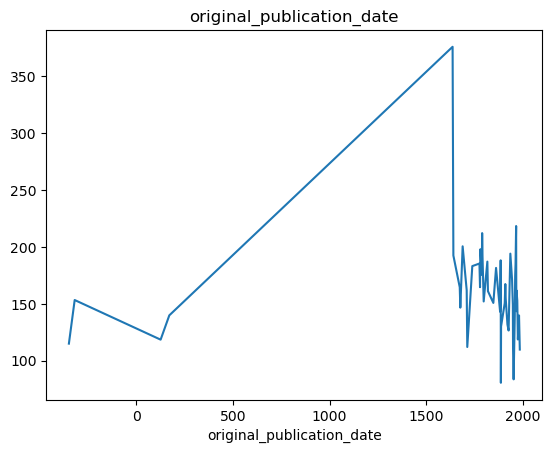

In [56]:
df_date2 = df.sort_values(by=['original_publication_date'])
df_date2.groupby(by = ['original_publication_date']).mean()['sentence_length'].plot(kind = 'line')
plt.title('original_publication_date')

Now, we may need to treat the date variable as categorical variables as we did to the authors and schools. Here are what we get:

In [57]:
comp1 = mc.MultiComparison(df['sentence_length'], df['original_publication_date'])
tbl3, c1, c2 = comp1.allpairtest(stats.ttest_ind, method= "bonf") #a1 contains all t-statsitics, test result and corrected p-values
print(tbl3)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.000
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
  -350   -320 -62.8479    0.0       0.0   True
  -350    125  -0.7663 0.4435       1.0  False
  -350    170 -13.6782    0.0       0.0   True
  -350   1637  -56.749    0.0       0.0   True
  -350   1641 -26.0562    0.0       0.0   True
  -350   1674  -55.004    0.0       0.0   True
  -350   1677  -22.239    0.0       0.0   True
  -350   1689 -73.9816    0.0       0.0   True
  -350   1710 -40.0492    0.0       0.0   True
  -350   1713   1.4609 0.1441       1.0  False
  -350   1739 -62.7623    0.0       0.0   True
  -350   1776 -76.1075    0.0       0.0   True
  -350   1779 -21.0916    0.0       0.0   True
  -350   1781  -68.775    0.0       0.0   True
  -350   1788 -33.5839    0.0       0.0   True
  -350   1790 -68.6111    0.0       0.0   True
  -350   1792 -44.5004    0.0       0.0   True
  -350   1798 

In [58]:
print(c1[1].sum())
print(len(c1[1]))

950
1128


As test result, 950 out of 1128 pairs reject the null hypothesis, which means the arguments we proposed in previous section still appear in this case.

### How different the quotes are between different school? Or even no difference.

As we mentioned before, we are going to find out the core value of each school in order to verify their uniqueness on writing quotes. It is a reseach targeting on text. Thus, we gonna introduce wordcoulds, which will show some frequent words that be used in quotes from sample schools. 

#### Aristotle

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

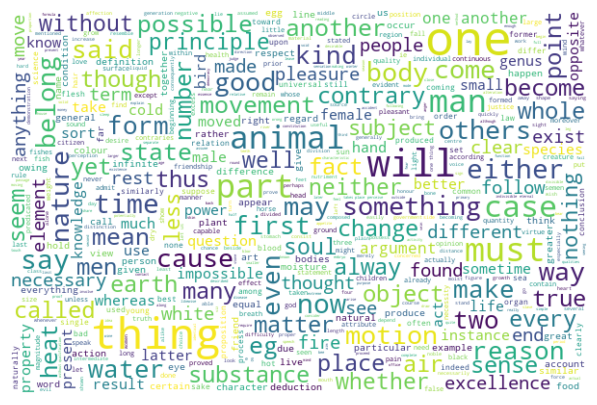

In [72]:
text = " ".join(txt for txt in df[df.school=='aristotle'].sentence_lowered)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                        width = 600, height = 400,
                        background_color="white").generate(text)
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Plato

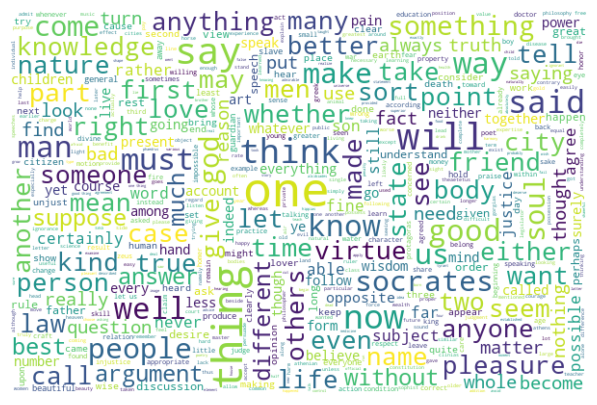

In [75]:
text = " ".join(txt for txt in df[df.school=='plato'].sentence_lowered)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                        width = 600, height = 400,
                        background_color="white").generate(text)
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Analytic

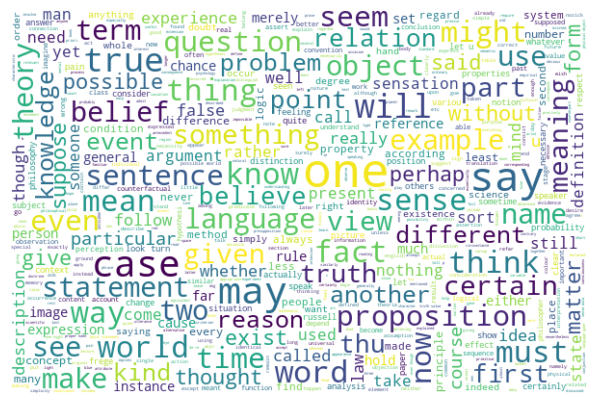

In [76]:
text = " ".join(txt for txt in df[df.school=='analytic'].sentence_lowered)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                        width = 600, height = 400,
                        background_color="white").generate(text)
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We can see that the frequency of words used in each of the three schools shown in the chart received common words as well as basic vocabulary because it is difficult to write a complete sentence without using those high frequency words. Apart from this vocabulary, we can still see that there are some slight differences. For example, analytic will use more words that are used to make statements, such as reason, proposal, truth, fact. This is also in line with their name. In addition, plato mentions socrates several times, while aristotle uses animal regularly in its sentences.


### More authors is good?

Another interesting thing we would like to explore in this data is whether the school consists of more authors would have more productions(quotres) than others. The base logic is more people trigger more discussions, more discussion will derive more ideas, more ideas more quotes. Before we start doing the reseach, two outliers, Aristotle and Plato, need to be dropped from the data. It one hundred percent not fair to compare them with others.  

In [143]:
df = df[(df['school'] != 'aristotle') & (df['school'] != 'plato')]
x = pd.DataFrame( df.groupby(by=['school','author'])['title'].count())
x.title

school           author         
analytic         Kripke             12479
                 Lewis              13120
                 Moore               3668
                 Popper              4678
                 Quine               7373
                 Russell             5073
                 Wittgenstein        9034
capitalism       Keynes              3411
                 Ricardo             3090
                 Smith              11693
communism        Lenin               4469
                 Marx               13489
continental      Deleuze            12540
                 Derrida             5999
                 Foucault           15240
empiricism       Berkeley            2734
                 Hume                8312
                 Locke               8885
feminism         Beauvoir           13017
                 Davis               3059
                 Wollstonecraft      2559
german_idealism  Fichte              5308
                 Hegel              22700
 

In [165]:
school = df.school.unique()
school.sort()
df_school = df.groupby(by='school')['title'].count()
avg = []
people = []
i = 0
for name in school:
    num  = len(df[df.school == name].author.unique())
    avg.append(df_school[i]/num)
    people.append(num)
    i +=1 
data = {'average quotes': avg, 'number of members': people}
newdf = pd.DataFrame(data, index = school, columns = ['average quotes', 'number of members'])
newdf

,average quotes,number of members
analytic,7917.857143,7
capitalism,6064.666667,3
communism,8979.000000,2
continental,11259.666667,3
empiricism,6643.666667,3
feminism,6211.666667,3
german_idealism,14045.333333,3
nietzsche,13548.000000,1
phenomenology,9524.333333,3
rationalism,5737.250000,4


In [166]:
newdf.sort_values('average quotes', ascending=False)

,average quotes,number of members
german_idealism,14045.333333,3
nietzsche,13548.000000,1
continental,11259.666667,3
phenomenology,9524.333333,3
communism,8979.000000,2
analytic,7917.857143,7
empiricism,6643.666667,3
feminism,6211.666667,3
capitalism,6064.666667,3
rationalism,5737.250000,4


According to the result, we can apparently find that the school with more members not always has better productivity compare to the schools consist of less members.

# Conclusion

Oeverall, we do obtain some tangible results after exploring the dataset. We firstly focus on the distribution of catergorical variables and numeric variables. We found that there are two outstanding authors which produced extraordinary amount of quotes, and the collections in their names also contained huge amount of quotes. But the distribution is relative evenly under the school variable. In addition, we realize that the time variables in this data is inconsistent and we failed to apply some time series method on that. However, we still find some features from that. In the research regarding the sentences length, while the charts showed us not that much differences of sentences length between each categorical sample, the t-test results justify the truth to us. I am glad the choice of investigating this problem not only using visualization but also the hypothesis test. And we deeply analyzed other intereting topics derived from the data overview. I hope those results are agreeable and make sense to all audiences. 

Although we pretend several useful conclusions, there still have some unfixed topics due to the constrain of dataset and our data analysis skills. It appears that we can do better with more data and more reference. 